## (1) Create a model whatever you like. 

It may be  y=3x1+5x2+μy=3x1+5x2+μ  or  y=4x1−3x2+9x3+μy=4x1−3x2+9x3+μ . Then:

- (a) generate random 30 observations depend on the model.
- (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
- (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you don not understand, just use the random.rand function.

In [33]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
# hold all coefs
coefs = []
# create instance
ols = linear_model.LinearRegression()
# keep random the same
np.random.seed(100)

for i in range(100):
    # create 2d array
    x = np.random.rand(30,2)
    # slice the array, taking all rows (:) but keeping the ith column (ith)
    y = x[:, 0] + 2*x[:,1] + np.random.rand(30)
    # train model
    ols.fit(x,y)
    # get coefficients
    coefs.append(ols.coef_)
    
print(np.mean(coefs, 0)) # coefs is a nested array
print(np.var(coefs, 0))
print("determination or R2 %.3f" % ols.score(x,y))

[1.01364387 2.01981367]
[0.0346508  0.03255635]
determination or R2 0.901


### (2) This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with mpg as the response and horsepower as the predictor.

- (a) What is the coefficient of mpg? How to explain it?
- (b) What is the determination of the model? How to explain it?
- (c) Write down the formula of the model.
- (d) What is the predicted mpg associated with a horsepower of 98?
- (e) Plot the response and the predictor.  as well as the least squares regression line.

In [35]:
data = pd.read_csv('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
data.replace({'?':np.nan}).dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [37]:
x = data[['horsepower']]
y = data[['mpg']]

In [38]:
from sklearn import linear_model
car = linear_model.LinearRegression()

In [39]:
car.fit(x, y)
print("car intercept %.3f" %car.intercept_)
print("car coef: %.3f" %car.coef_)
print("coefficient measures how x affects y")
print("Meaning, when horsepower goes up 1 unit, mpg goes down by %.3f" %car.coef_)
print("But how much of that is explained by horespower? That is where determination comes in")
print("determination or R2 %.3f" % car.score(x,y))
print("So, about 60% of the variance is explained via x")
print('')
print('')

print("MPG for a car with 98 horse power: %.3f" %car.predict([[98]]))
print("the formula would be mpg = car coef * x + intercept")


car intercept 39.936
car coef: -0.158
coefficient measures how x affects y
Meaning, when horsepower goes up 1 unit, mpg goes down by -0.158
But how much of that is explained by horespower? That is where determination comes in
determination or R2 0.606
So, about 60% of the variance is explained via x


MPG for a car with 98 horse power: 24.467
the formula would be mpg = car coef * x + intercept


In [40]:
rss = np.sum((y-car.predict(x)) ** 2)
print('the rss is: %.3f' %rss)
print('To quantify the difference between the model and the observations, we use the residual sum of squares')

the rss is: 9385.916
To quantify the difference between the model and the observations, we use the residual sum of squares


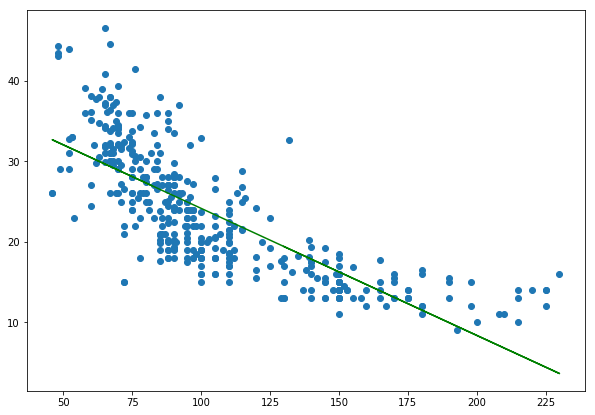

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(data['horsepower'],data['mpg']) #use in list not nested array
plt.plot(x, car.predict(x), color='g')



## # (3) Do not use the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the determination and prediction. Note that the results should be exactly the same with the results in question (2).

In [42]:
poke = pd.read_csv('pokemon.csv')
poke.head(5)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [43]:
plin = linear_model.LinearRegression()

In [44]:
x = poke[['Attack']]
y = poke[['Defense']]

In [45]:
plin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
coeff = plin.coef_
r2 = plin.score(x,y)

print("coef is %.3f" %coeff)
print("rs is %.3f" %r2)
print("If you have 82 as attack, you should have around %.3f defense" %plin.predict([[82]]))


coef is 0.421
rs is 0.192
If you have 82 as attack, you should have around 75.106 defense


In [47]:
print(plin.predict([[100]]))

[[82.69283801]]


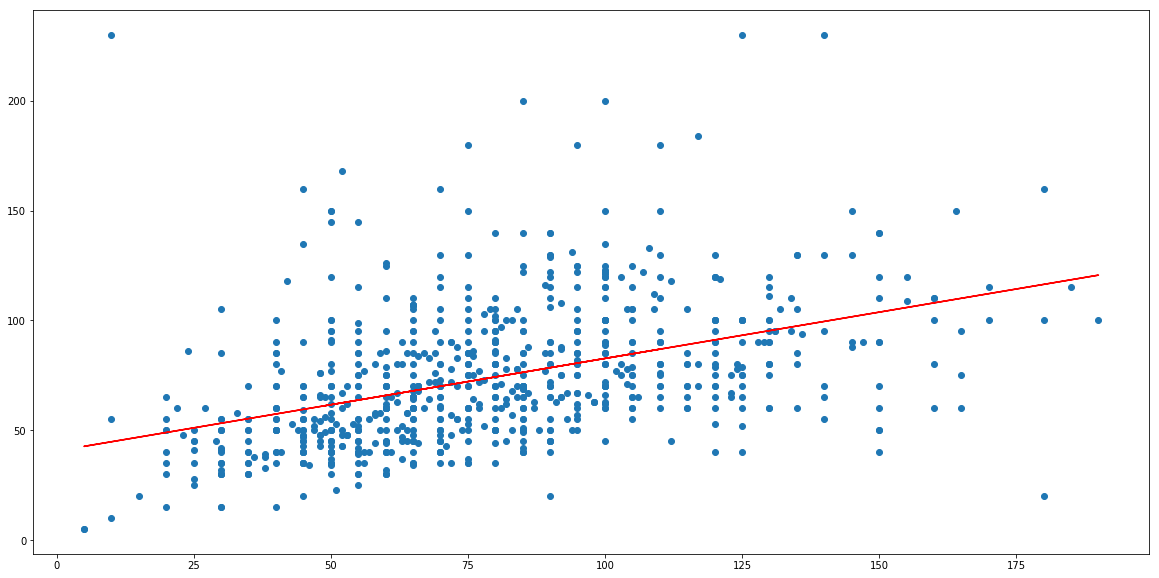

In [48]:
plt.figure(figsize=(20,10))
plt.scatter(poke['Attack'],poke['Defense']) #use in list not nested array
plt.plot(x, plin.predict(x), color='r')

In [49]:
poke.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [50]:
x = poke[['Total']]
y = poke[['Attack']]

In [51]:
plin.fit(x,y)
print('r2 is %.3f' %plin.score(x,y))
print('coef is %.3f' % plin.coef_)

r2 is 0.542
coef is 0.199


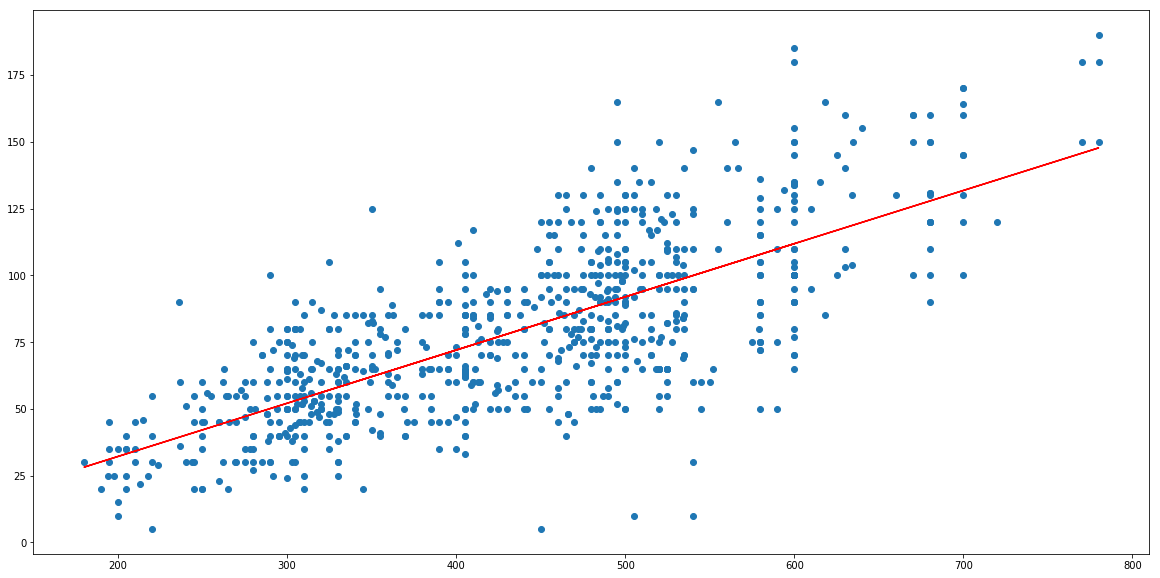

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(poke['Total'], poke['Attack'])
plt.plot(x, plin.predict(x), color='r')


In [ ]:
plt.hist(plin., color='green', bins=10)
print('')